In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

Duration = 3.7877551020408164s
(83520,)


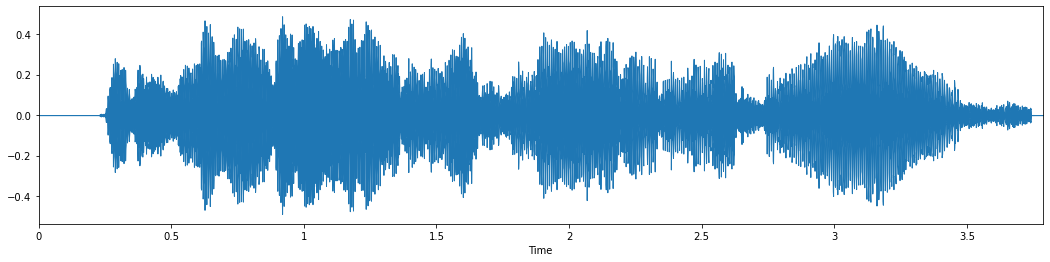

In [11]:
wav_fname = "../DataBase/بسم الله الرحمن الرحيم .. صوت (128  kbps) (shabakngy.com).wav"
# sr,data=scipy.io.wavfile.read(wav_fname)
data,sr=librosa.load(wav_fname)
plt.figure(figsize=(18,4))
librosa.display.waveplot(data,sr)
length = data.shape[0] / sr
print(f"Duration = {length}s")
print(np.shape(data))


In [13]:
print(data.shape[0])

83520


In [18]:
tempo, beat_frames = librosa.beat.beat_track(y=data, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
print(beat_frames)

Estimated tempo: 92.29 beats per minute
[13]


In [17]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[0.30185941]


In [26]:
mfcc = librosa.feature.mfcc(y=data, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
mfcc_delta2
# plt.figure(figsize=(18,4))
# librosa.display.waveplot(mfcc_delta,sr)

array([[ 4.2771569e-14,  4.2771569e-14,  4.2771569e-14, ...,
        -1.7752672e+01, -1.7752672e+01, -1.7752672e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -9.2849150e+00, -9.2849150e+00, -9.2849150e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.6715838e-01,  9.6715838e-01,  9.6715838e-01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -6.8429850e-02, -6.8429850e-02, -6.8429850e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.1547567e-02,  4.1547567e-02,  4.1547567e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.5425439e-01,  4.5425439e-01,  4.5425439e-01]], dtype=float32)

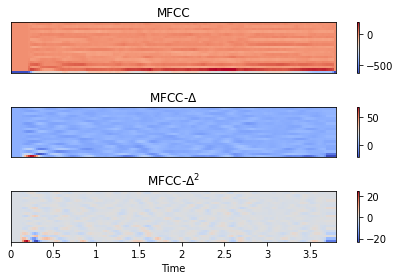

In [25]:
import matplotlib.pyplot as plt
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.title('MFCC')
plt.colorbar()
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_delta)
plt.title(r'MFCC-$\Delta$')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_delta2, x_axis='time')
plt.title(r'MFCC-$\Delta^2$')
plt.colorbar()
plt.tight_layout()